# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os

project_path = "/content/drive/My Drive/NeuralNetworks/CNN/Lab/"
os.chdir(project_path)

#os.chdir('/content/drive/My Drive/Advance Computer Vision/Assignment')
ProjFolder=os.getcwd()


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load(ProjFolder+'/images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)

In [5]:
data[:5]
#data.shape

array([[array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
        list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615

In [6]:
data[4][1]

[{'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5586206896551724, 'y': 0.19938650306748465},
   {'x': 0.6603448275862069, 'y': 0.3773006134969325}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.38620689655172413, 'y': 0.18711656441717792},
   {'x': 0.4896551724137931, 'y': 0.4049079754601227}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.1724137931034483, 'y': 0.23006134969325154},
   {'x': 0.2775862068965517, 'y': 0.44171779141104295}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7155172413793104, 'y': 0.19938650306748465},
   {'x': 0.8448275862068966, 'y': 0.41411042944785276}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.2982758620689655, 'y': 0.44171779141104295},
   {'x': 0.4189655172413793, 'y': 0.65337423

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        
        masks[index][y1:y2, x1:x2] = 1
        

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Print the shape of X_train and mask array  (1 mark)

In [11]:
X_train.shape

(409, 224, 224, 3)

In [12]:
masks.shape

(409, 224, 224, 3)

In [13]:
data.shape[0]

409

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


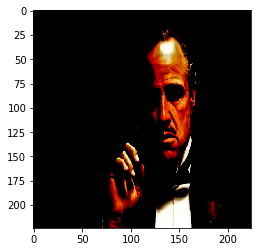

In [14]:
from matplotlib import pyplot
n = 10
#print(X_train[n])
pyplot.imshow(X_train[n])

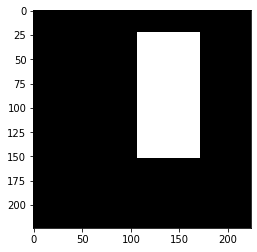

In [15]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [17]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

IMAGE_SIZE = 128 # MobileNet takes images of size 128*128*3 

EPOCHS = 10 # Number of epochs. I got decent performance with just 5.
BATCH_SIZE = 32 # Depends on your GPU or CPU RAM.

def create_model():
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA)
    for layer in model.layers:
        layer.trainable = True

    # Add all the UNET layers here
    input_img = Input((IMAGE_HEIGHT, IMAGE_WIDTH, 3), name='img')
    n_filters=16
    dropout=0.5
    batchnorm=True
    
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(3, (1,1), activation='sigmoid') (c9)
    model = Model(inputs=[input_img], outputs=[outputs])

    return model

Using TensorFlow backend.


In [0]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(3, 3), kernel_initializer="he_normal", padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(3, 3), kernel_initializer="he_normal", padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

### Call the create_model function

In [19]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 0s 0us/step












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 16) 448         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 16) 64          conv2d_1[0][0]                   
________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
from keras import backend as K
def dice_coefficient(y_true, y_pred):
  smooth=1
  #dice=1
  intersection = K.sum(y_true * y_pred, axis=[1,2,3])
  union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
  dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
  #print(dice1)
  return dice
  #a_bigrams = y_true
  #b_bigrams = y_pred
  #overlap = len(a_bigrams & b_bigrams)
  #return overlap * 2.0/(len(a_bigrams) + len(b_bigrams))

def dice_coeff(y_true, y_pred):
  coeff = tf.py_func(dice_coefficient, [y_true, y_pred], tf.int64)
  return coeff

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss_func(y_true, y_pred):
  res = binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())
  #res = res.astype(np.float32)
  return res

#def loss_func(y_true, y_pred):
  #loss_ret = tf.py_func(loss, [y_true, y_pred], tf.float32)
  #return loss_ret

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
model.compile(optimizer='Adam', loss=[loss_func], metrics=[dice_coefficient])

In [23]:
model

### Define checkpoint and earlystopping

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [31]:
X_train.shape

(409, 224, 224, 3)

In [32]:
masks.shape

(409, 224, 224, 3)

In [29]:
model.fit(X_train,masks,epochs=30,batch_size = 1,verbose=1)



Epoch 1/30
409/409 [==============================] - 24s 58ms/step - loss: 1.6925 - dice_coefficient: 0.3374
Epoch 2/30
409/409 [==============================] - 15s 37ms/step - loss: 1.2794 - dice_coefficient: 0.4325
Epoch 3/30
409/409 [==============================] - 15s 37ms/step - loss: 1.1995 - dice_coefficient: 0.4620
Epoch 4/30
409/409 [==============================] - 15s 37ms/step - loss: 1.1680 - dice_coefficient: 0.4732
Epoch 5/30
409/409 [==============================] - 15s 38ms/step - loss: 1.1021 - dice_coefficient: 0.4947
Epoch 6/30
409/409 [==============================] - 15s 38ms/step - loss: 1.0766 - dice_coefficient: 0.5018
Epoch 7/30
409/409 [==============================] - 15s 37ms/step - loss: 1.0629 - dice_coefficient: 0.5075
Epoch 8/30
409/409 [==============================] - 15s 38ms/step - loss: 1.0279 - dice_coefficient: 0.5192
Epoch 9/30
409/409 [==============================] - 15s 37ms/step - loss: 1.0082 - dice_coefficient: 0.5261
Epoch 10

### Get the predicted mask for a sample image   (3 marks)

In [30]:
n = 150
sample_image = X_train[n]
#X_test = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
#img = cv2.resize(sample_image, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
#X_test[0] = preprocess_input(np.array(img, dtype=np.float32))
X_test[0]=X_train[n]
X_test.shape

NameError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


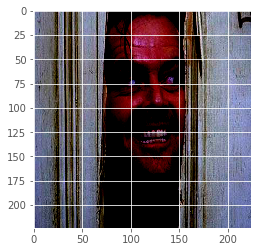

In [0]:
pyplot.imshow(X_test[0])

### Impose the mask on the image (3 marks)

In [0]:
mask_test=model.predict(X_test)

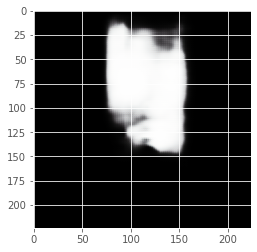

In [0]:
pyplot.imshow(mask_test[0])